In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np

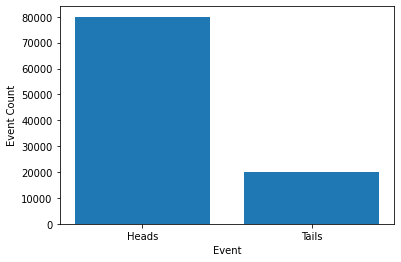

In [2]:
#biased coin
p_biased = 0.8
biased_rvs = bernoulli.rvs(p_biased, size = 100000, random_state = 1901)
x = [1, 2]
y_biased = [sum(biased_rvs), len(biased_rvs) - sum(biased_rvs) ]

plt.bar(x, y_biased)
plt.xticks(x, ['Heads', 'Tails'])
plt.ylabel("Event Count")
plt.xlabel("Event")
plt.show()

In [3]:
def generate_unbiased_tosses(bias_p = 0.8, rvs_size = 100000):
    
    assert rvs_size % 2 == 0, 'please specify an even sample size'
    
    unbiased_rvs = []
    tosses = list(bernoulli.rvs(bias_p, size = rvs_size * 10, random_state = 2020))
    
    toss_1_pointer = 0
    toss_2_pointer = 1
    
    #the loop goes on until we've exhausted our biased coin tosses or we've generated
    #all the unbiased coin tosses we need 
    while(toss_2_pointer < len(tosses) and len(unbiased_rvs) < rvs_size):
        toss_1 = tosses[toss_1_pointer]
        toss_2 = tosses[toss_2_pointer]
        
        if toss_1 != toss_2:
            unbiased_rvs.append(toss_1)
        
        #advance to next pair of coin tosses
        toss_1_pointer += 2
        toss_2_pointer += 2
        
            
    return np.array(unbiased_rvs)
        
        
    

In [4]:
unbiased_rvs = generate_unbiased_tosses()

# expected value of the sample
print(np.mean(unbiased_rvs))


0.50024


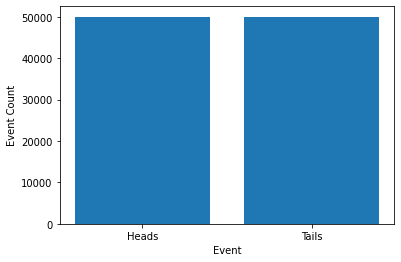

In [5]:
x = [1, 2]
y = [sum(unbiased_rvs), len(unbiased_rvs) - sum(unbiased_rvs) ]

plt.bar(x, y)
plt.xticks(x, ['Heads', 'Tails'])
plt.ylabel("Event Count")
plt.xlabel("Event")
plt.show()